In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Разбираем градиентный спуск

## Определение
Обычно, с помощью градиентного спуска мы хотим добиться минимизации стоимостной функции $J$ путем изменения параметров $\Theta$. Чтобы определить в каком направлении каждый параметр $\theta_j$ должен изменяться нам понадобиться первая производная $\frac{\partial}{\partial \Theta} J(\Theta)$:
$$ \Theta = \Theta - \alpha \frac{\partial}{\partial \Theta} J(\Theta), \Theta \in \mathbb{R}^{1 \times n}$$

Искусственно ограничим эту операцию до `max_iterations` раз, чтобы избежать слишком долгого обучения некоторых моделей.

## Регуляризация
Чтобы избежать переобучения, сделаем возможность передавать параметр регуляризации $\lambda$. Таким образом мы уменьшим влияние каждого параметра $\theta_j$ на итоговую стоимость $J$, уменьшая коэффициент полиномиальности функции. Так как регуляризация применяется к стоимостной функции $J$, ее реализацию стоит учитывать при создании функции.

## Масштабирование
Зато Feature Scaling удобно реализовать внутри градиента. Он должен приводить все $X_{i,j}$ к определенной наиболее удобной области $ 0 \geq \theta_j \geq 1$: это важно, потому что если параметр 1 отличается от параметра 2 в несколько порядков, то и на конечную стоимость они будут влиять слишком различно, приводя все параметры к одним порядкам мы выравниваем их важность в оптимизации и в обучении. Мы хотим выделить два основных момента:
  1) Получение $\mu$ — средних значений каждой фичи — и нормализация $ \sum \limits _{i=1} ^{n} X_i - \overline{X_i}$
  
  2) Получение $\sigma$ — среднеквадратичного отклонения каждой фичи и нормализация $ \sum \limits _{i=1} ^{n} X_i /\bar{X_i}$

In [105]:
def feature_scaling(X):
    X_norm = X
    
    mu = X_norm.mean(0)
    sigma = X_norm.std(0)
    
    X_norm = (X_norm - mu) / sigma
    
    return X_norm, mu, sigma

In [106]:
def optimize_gradient(X, y, init_theta, 
                      cost_func,
                      learning_rate, 
                      max_iterations = 1000,
                      regularization = None,
                      scaling=False):
    J = 0
    J_history = []
    theta = init_theta
    theta_history = np.zeros((max_iterations,theta.shape[0]))
    
    if scaling == True:
        X_local = feature_scaling(X)
        X_local = np.concatenate((np.ones((X1.shape[0],1)),X),1)
    else:
        X_local = np.concatenate((np.ones((X1.shape[0],1)),X),1)
        
    for i in range(max_iterations):
        J, dJ = cost_func(X_local, y, theta, regularization = regularization)
        J_history.append(J)
        
        theta = theta - learning_rate * dJ
        theta_history[i,:] = theta.reshape(init_theta.shape[0])
    
    return (theta, J, J_history, theta_history)

/Users/love/Documents/ML/machine-learning-ex2/ex2


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


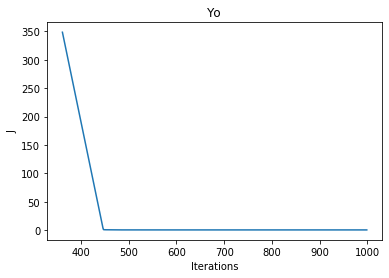

In [107]:
%cd ~/Documents/ML/machine-learning-ex2/ex2/

def cost(X,y,theta, regularization = None):
    m = X.shape[0]
    h =  1/(1 + np.exp(-1 * (X @ theta)))
    errs = -y * np.log(h) - (1 - y) * np.log(1 - h)
 
    if regularization != None:
        J_reg = regularization / (2*m) * np.sum(theta[1:]**2)
        theta_shadow = theta
        theta_shadow[0] = 0
        print(theta_shadow)
        d_reg = (regularization / m) * theta_shadow
    else:
        J_reg = 0
        d_reg = 0
    
    J = 1 / m * np.sum(errs) + J_reg
    dtheta = (1 / m * (h - y).T @ X) + d_reg
    
    return J, dtheta.T


def draw_J_history(history):
    iterations = np.arange(len(history))

    plt.plot(iterations,history)
    plt.xlabel("Iterations")
    plt.ylabel("J")
    plt.title(label="Yo")
    plt.show()
    return



# Two-feature dataset. M=99 N=2
dataset_2X = pd.read_csv("ex2data1.txt")

X1 = dataset_2X.to_numpy()[:,0:2].reshape(99,2)
Y1 = dataset_2X.to_numpy()[:,2].reshape(99,1)
theta = np.array([[-20],[-20],[-20]])

theta, J, history, thet = optimize_gradient(X1,Y1,theta, cost, 0.001,1000, scaling=True)

draw_J_history(history)